In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\akash\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("result-BLAKE.csv")

In [3]:
df.head(30)

,SK Size,PK Size,Key Gen Time,Sign Size,Sign Time,Verify Time,Name
0,64,32,0.231,9248,3.440,0.011,SPHINCS+ 128S
1,64,32,0.019,15824,0.679,0.021,SPHINCS+ 128F
2,96,48,0.105,19800,11.837,0.016,SPHINCS+ 192S
3,96,48,0.026,34440,0.969,0.031,SPHINCS+ 192F
4,128,64,0.272,34848,10.852,0.021,SPHINCS+ 256S
5,128,64,0.068,48352,1.969,0.029,SPHINCS+ 256F
6,64,32,0.604,6245,238.298,0.111,SPHINCS+C1 128S
7,64,32,0.025,14685,0.775,0.023,SPHINCS+C1 128F
8,96,48,0.474,13381,296.466,0.147,SPHINCS+C1 192S
9,96,48,0.029,32723,1.246,0.034,SPHINCS+C1 192F


In [4]:
df = df.round(3) 

In [5]:
def plot_bar_multi_columns(data, x_col, y_cols, y_label, colormap='viridis'):
    """
    Create a bar plot for multiple columns in a Pandas DataFrame with a gap between groups.

    Parameters:
    - data: The DataFrame containing the data to be plotted.
    - x_col: The name of the column to be used as the X-axis.
    - y_cols: A list of column names to be used as Y-axes.
    """
    # Extract X and Y data from the DataFrame
    x_data = data[x_col]
    y_data = data[y_cols]

    # Number of bars (Y-axes)
    num_y_axes = len(y_cols)
    

    # Set up the figure and axis with a larger figsize
    fig, ax = plt.subplots(figsize=(18, 12))

    # Width of each group of bars
    group_width = 1
    bar_width = (group_width / num_y_axes)-0.2

    # Define color options for bars
    colors = ['b', 'y', 'm', 'g', 'r', 'c', 'k']

    # Loop through each Y-axis and create a bar for each
    for i in range(num_y_axes):
        x_positions = [x + i * bar_width for x in range(len(x_data))]
        y_values = y_data[y_cols[i]]
        color = colors[i % len(colors)]  # Cycle through colors

        ax.bar(x_positions, y_values, width=bar_width, label=y_cols[i], color=color)

        # Add annotations to the bars
        for x, y in zip(x_positions, y_values):
            if len(y_cols) > 1:
                ax.text((x + bar_width / 2), y, "   " + str(y), ha='center', va='bottom', rotation=90, fontsize=12, weight='bold')
            else:
                ax.text((x + bar_width / 2)-0.4, y, "   " + str(y), ha='center', va='bottom', rotation=90, fontsize=12, weight='bold')

    # Set the X-axis labels and legend
    ax.set_xticks([(x + (group_width / 2))-0.5 for x in range(len(x_data))])
    ax.set_xticklabels(x_data, rotation=90, va='top', fontsize=12)
    plt.yticks(rotation=90, fontsize=12) 
    ax.set_xlabel(x_col, rotation=180, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.margins(y=0.3)
    legend = ax.legend(loc='upper left',  bbox_to_anchor=(0, 1), ncol=len(y_cols))
    

    for item in legend.get_texts():
        item.set_rotation(90)


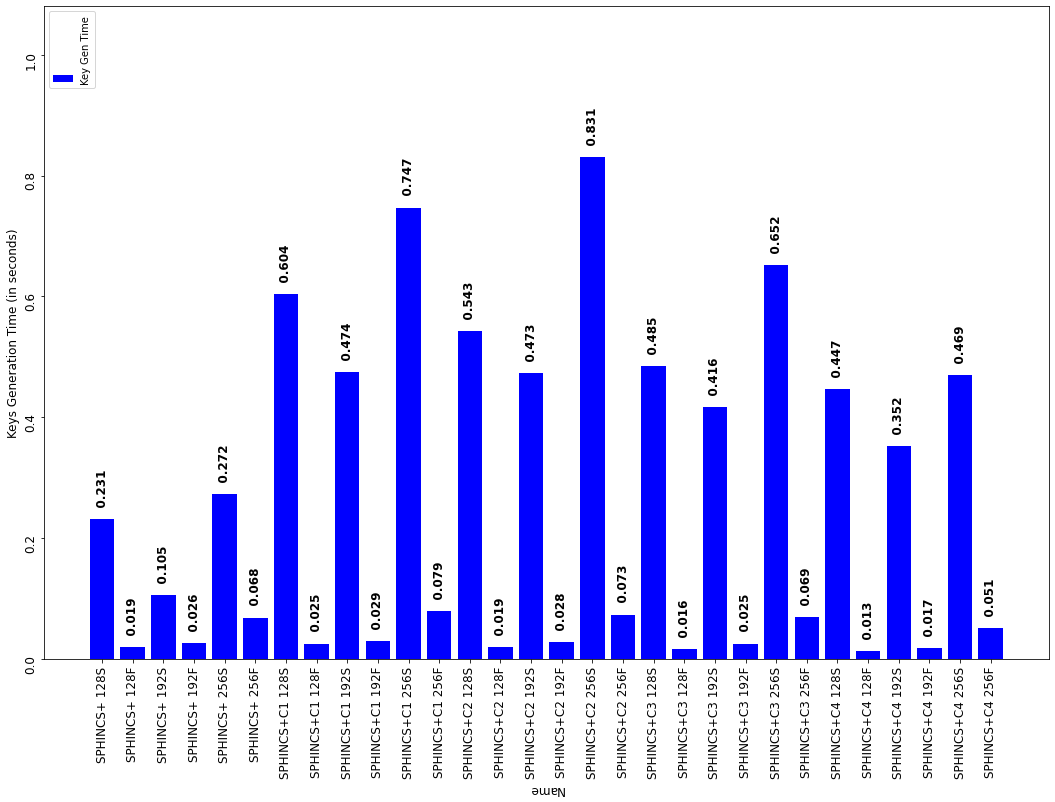

In [6]:
plot_bar_multi_columns(df, 'Name', ["Key Gen Time"], "Keys Generation Time (in seconds)", 'hsv')

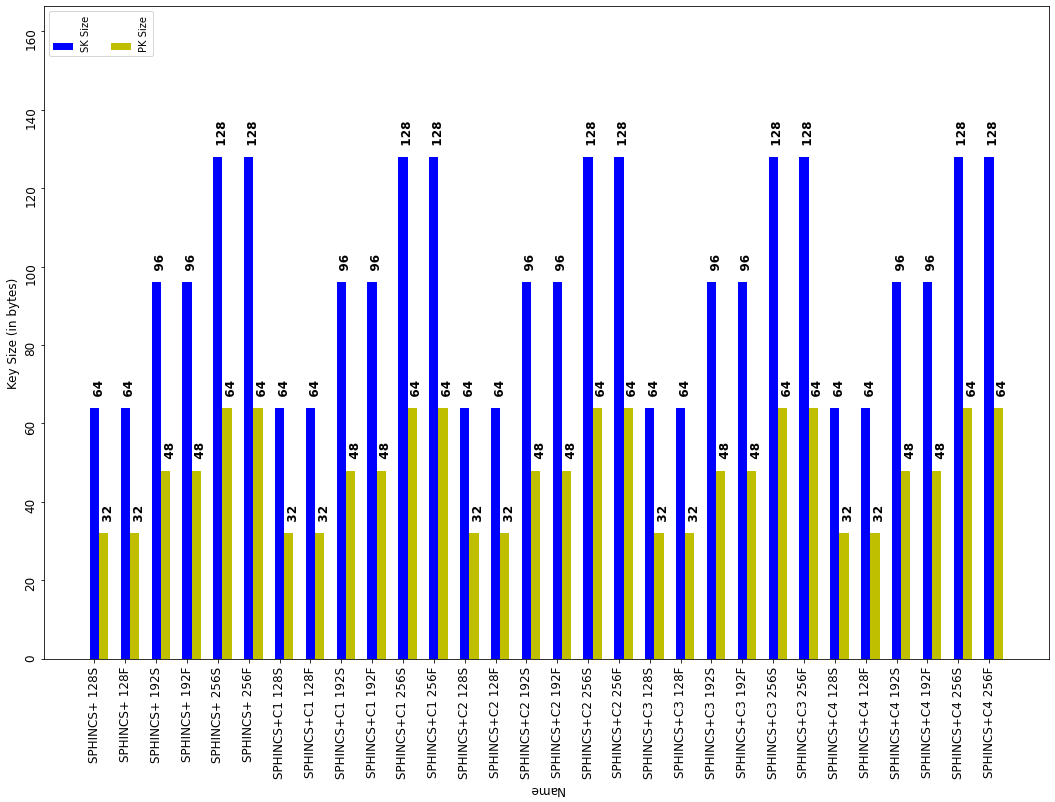

In [7]:
plot_bar_multi_columns(df, 'Name', ["SK Size","PK Size"], "Key Size (in bytes)")

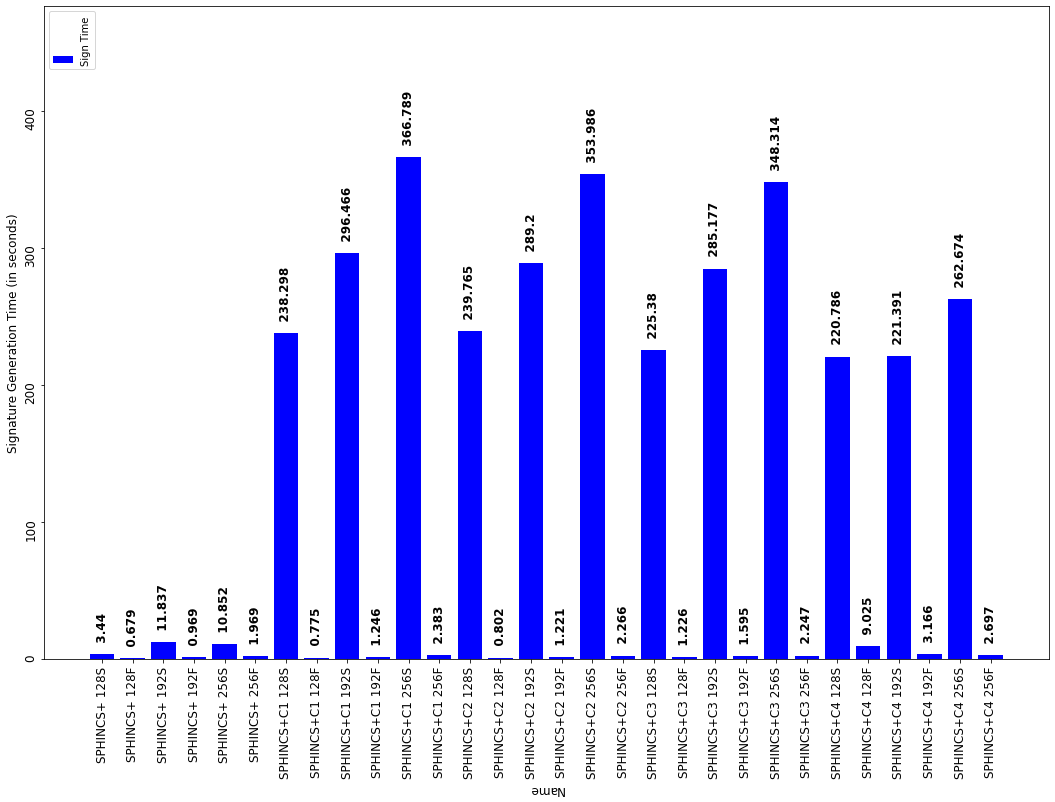

In [8]:
plot_bar_multi_columns(df, 'Name', ["Sign Time"], "Signature Generation Time (in seconds)")

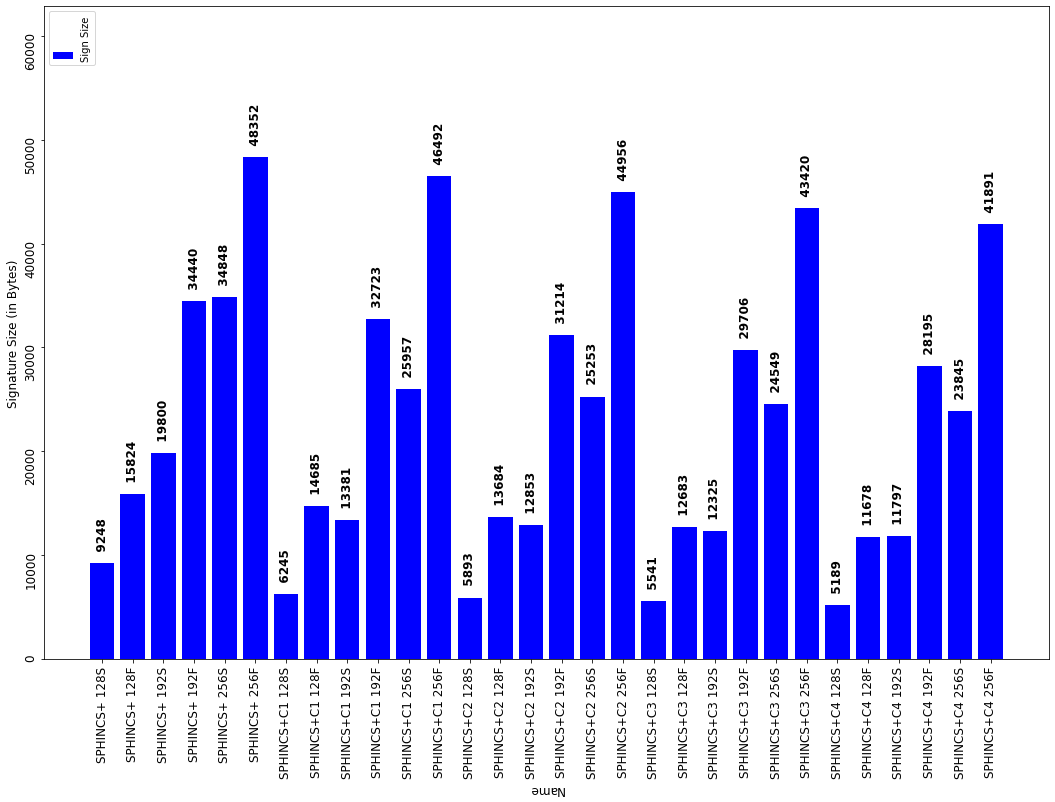

In [9]:
plot_bar_multi_columns(df, 'Name', ["Sign Size"], "Signature Size (in Bytes)")

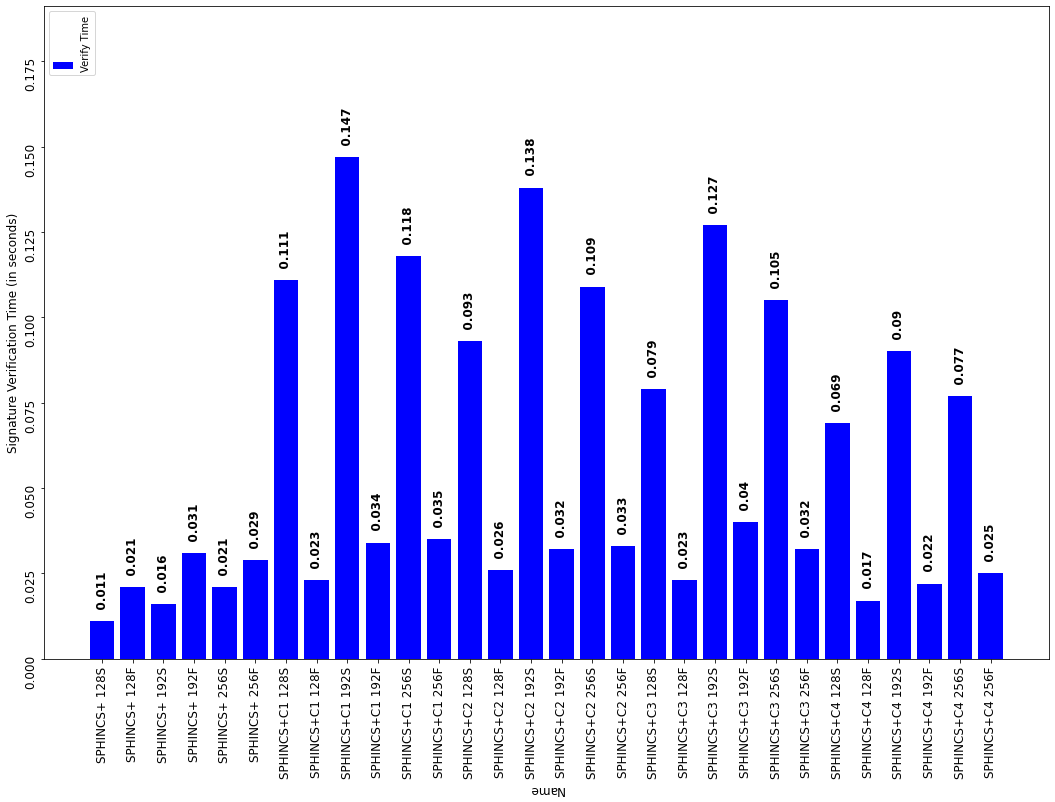

In [10]:
plot_bar_multi_columns(df, 'Name', ["Verify Time"], "Signature Verification Time (in seconds)")

In [11]:
df2 = df.sort_values(by=['Sign Size'])

In [12]:
df2.head(30)

,SK Size,PK Size,Key Gen Time,Sign Size,Sign Time,Verify Time,Name
24,64,32,0.447,5189,220.786,0.069,SPHINCS+C4 128S
18,64,32,0.485,5541,225.380,0.079,SPHINCS+C3 128S
12,64,32,0.543,5893,239.765,0.093,SPHINCS+C2 128S
6,64,32,0.604,6245,238.298,0.111,SPHINCS+C1 128S
0,64,32,0.231,9248,3.440,0.011,SPHINCS+ 128S
25,64,32,0.013,11678,9.025,0.017,SPHINCS+C4 128F
26,96,48,0.352,11797,221.391,0.090,SPHINCS+C4 192S
20,96,48,0.416,12325,285.177,0.127,SPHINCS+C3 192S
19,64,32,0.016,12683,1.226,0.023,SPHINCS+C3 128F
14,96,48,0.473,12853,289.200,0.138,SPHINCS+C2 192S


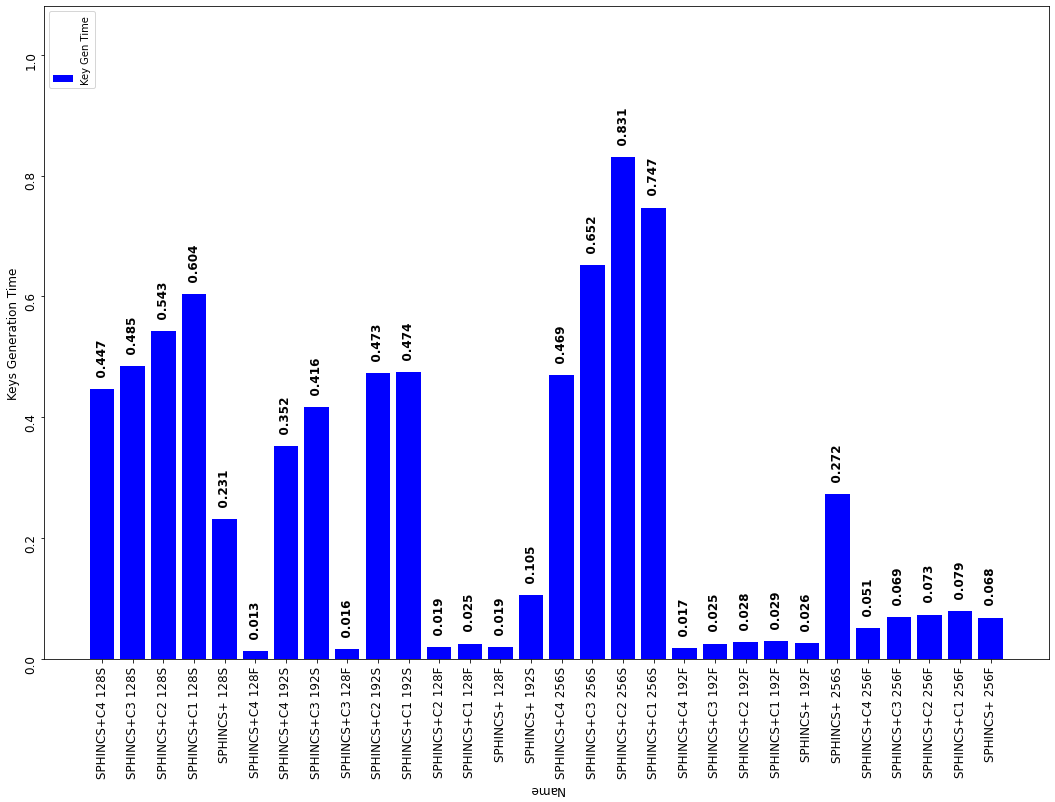

In [13]:
plot_bar_multi_columns(
    df2, 'Name', ["Key Gen Time"], "Keys Generation Time", 'hsv')

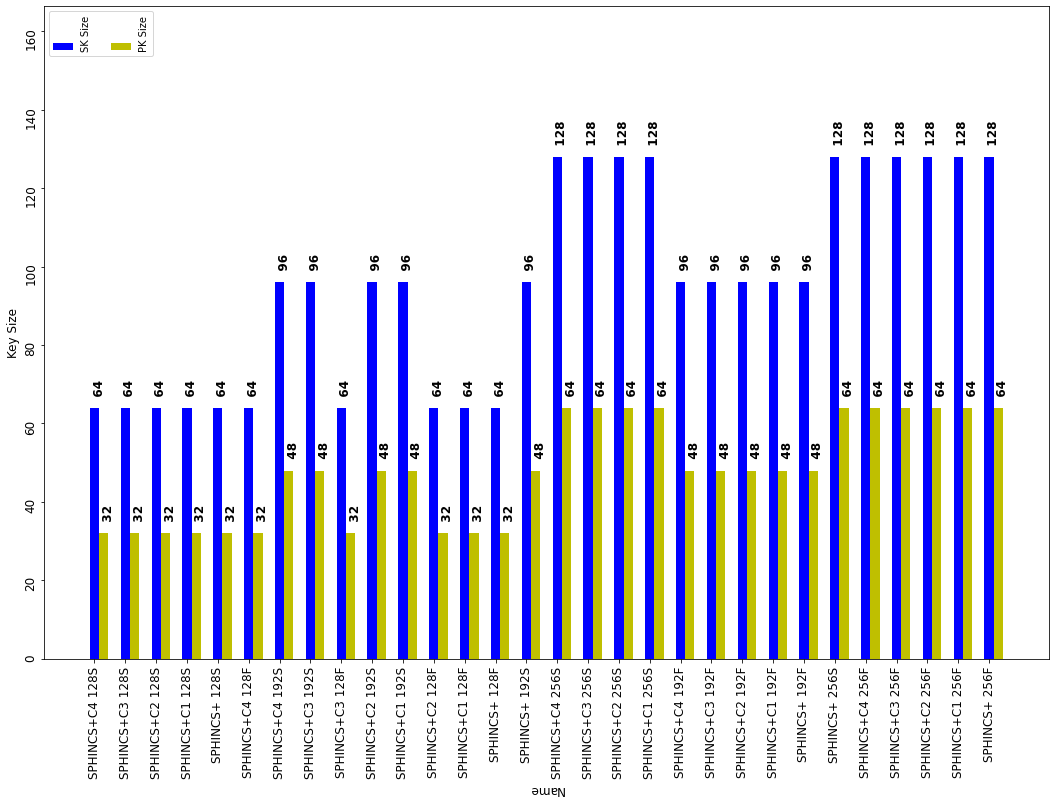

In [14]:
plot_bar_multi_columns(df2, 'Name', ["SK Size","PK Size"], "Key Size")

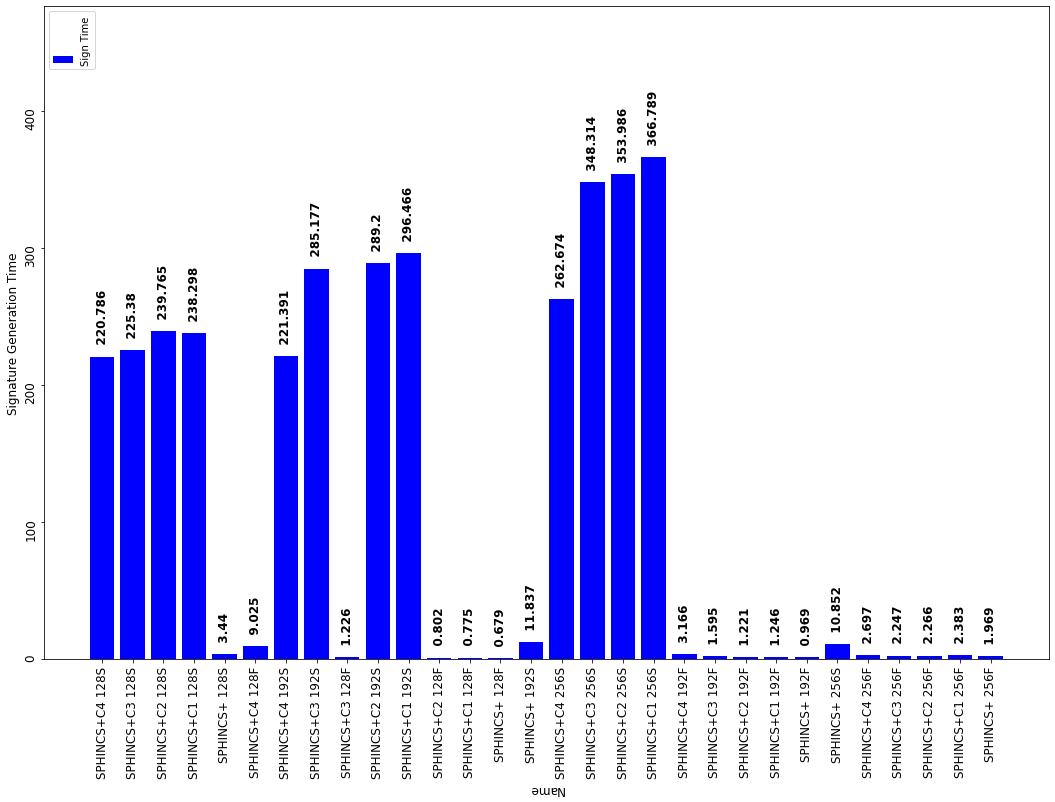

In [15]:
plot_bar_multi_columns(df2, 'Name', ["Sign Time"], "Signature Generation Time")

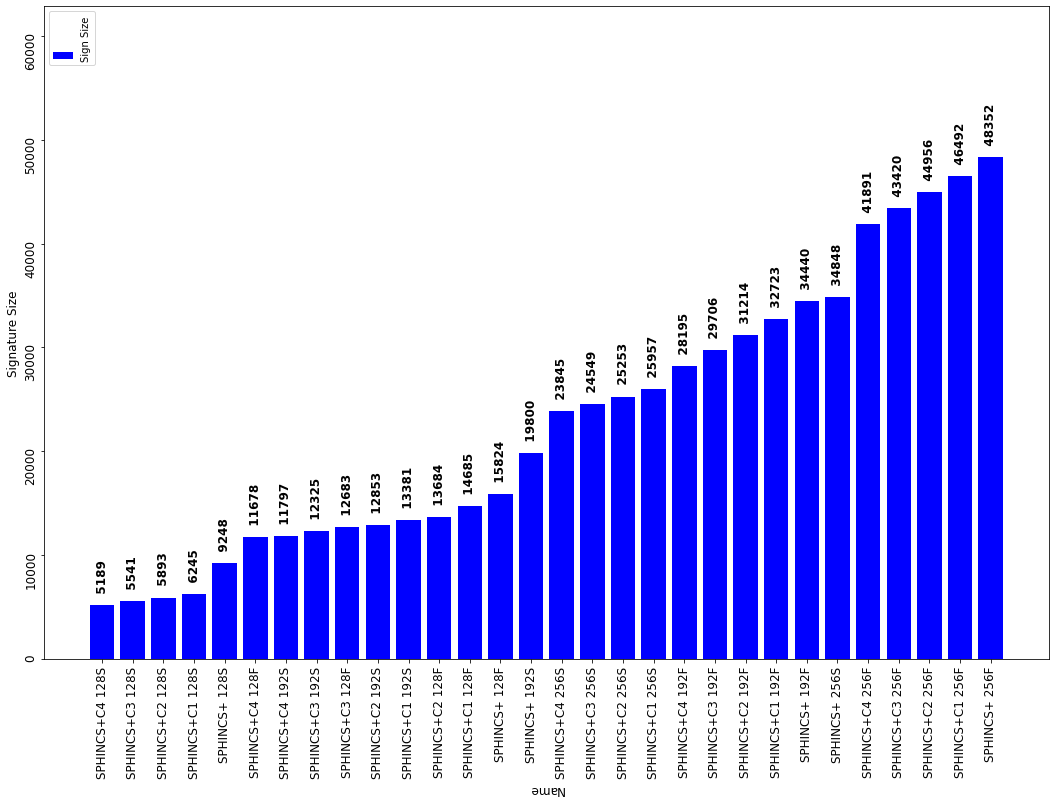

In [16]:
plot_bar_multi_columns(df2, 'Name', ["Sign Size"], "Signature Size")


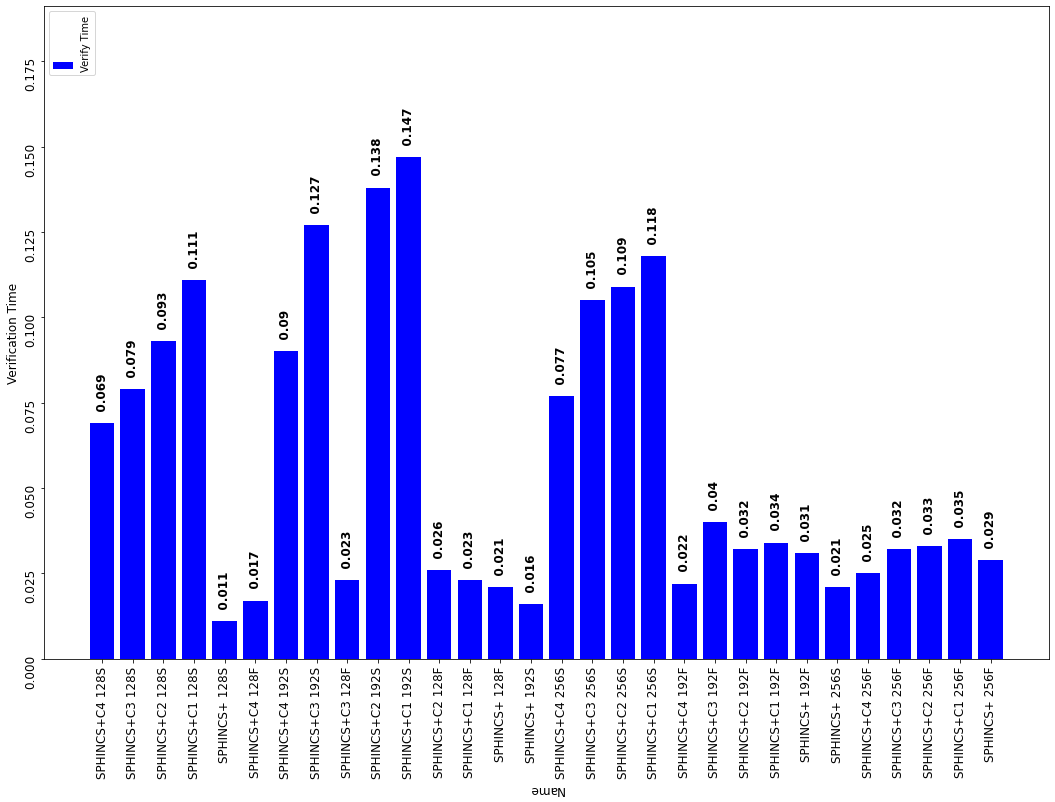

In [17]:
plot_bar_multi_columns(df2, 'Name', ["Verify Time"], "Verification Time")